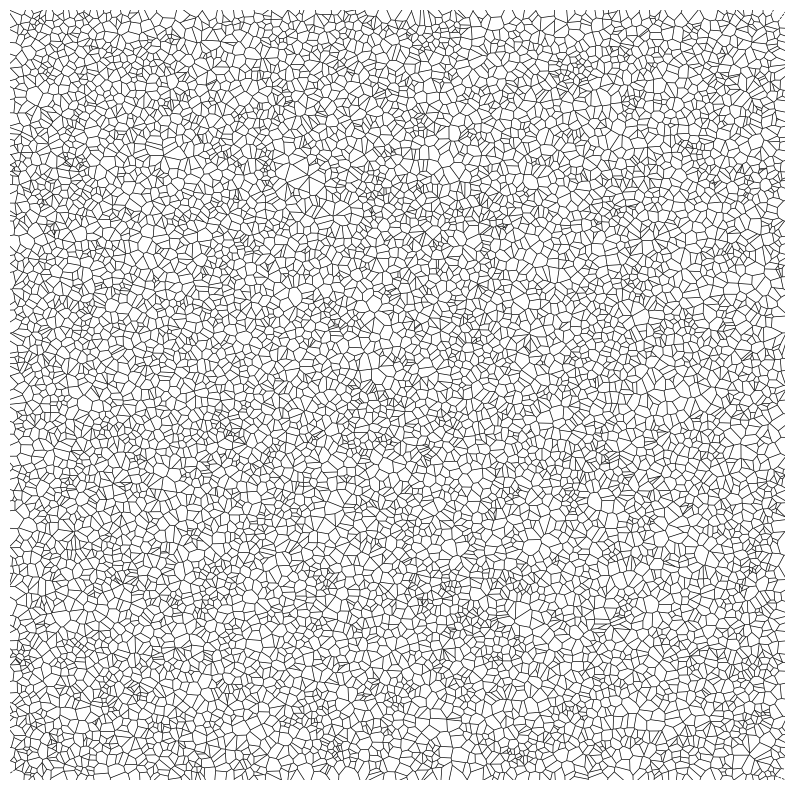

In [48]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt
from shapely.geometry import Polygon

#Let us generate a few random coordinates
coords = np.random.rand(10000, 2)
vor = Voronoi(coords)

fig, ax = plt.subplots(figsize = [10,10])

fig = voronoi_plot_2d(vor, ax=ax, point_size = 0, show_vertices = False, line_width = 0.5)




ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_axis_off()
#plt.savefig('voronoi.png', dpi = 700, bbox_inches = 'tight')

In [49]:
vor.regions
voronoi_polygons = [Polygon(vor.vertices[region]) 
                    for region in vor.regions 
                    if region and -1 not in region]



In [54]:
area = [i.area for i in voronoi_polygons if i.area < 0.005]
np.mean(area)

0.00011219607196178013

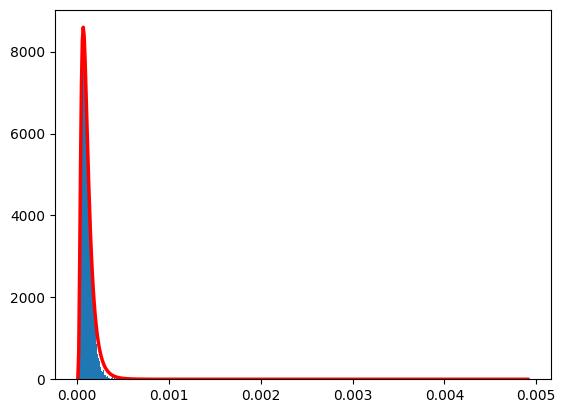

In [68]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
#ax.set_xlim([0,0.001])
def log_norm(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
counts, bins, _ = ax.hist(area, bins=500, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
log_norm_points = log_norm(bin_centers, *popt)
ax.plot(bin_centers, log_norm_points , color='red', label='Fitted curve', linewidth = 2.5)

In [69]:
np.mean(area), np.std(area), bin_centers[np.argmax(log_norm_points)]

(0.00011219607196178013, 0.00016868715159161808, 6.737912767290578e-05)